In [11]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
import json
import glob
import random
from btbench_config import *
from braintreebank_subject import Subject
from btbench_datasets import BrainTreebankSubjectTrialBenchmarkDataset
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = 'font_arial.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Arial'

In [4]:
subject_id, trial_id = 3, 0
subject = Subject(subject_id, cache=False)
subject.load_neural_data(trial_id)

In [54]:
show_n_electrodes = 4
show_electrodes = np.random.choice(subject.electrode_labels, show_n_electrodes)

window_from = 9 * SAMPLING_RATE
window_to = 21 * SAMPLING_RATE

neural_data = []
for electrode_label in show_electrodes:
    neural_data.append(subject.get_electrode_data(electrode_label, trial_id, window_from=window_from, window_to=window_to))
neural_data = np.array(neural_data)

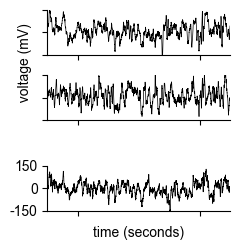

In [68]:

fig, axes = plt.subplots(show_n_electrodes, 1, figsize=(2.5, .65*show_n_electrodes), gridspec_kw={'height_ratios': [1, 1, 0.1, 1]})
#time = np.arange(window_from, window_to) / SAMPLING_RATE

for i in range(show_n_electrodes):
    if i == 2:
        axes[i].axis('off')
        continue
    axes[i].plot(time, neural_data[i], linewidth=.5, color='black')
    axes[i].set_ylabel(f'')
    #axes[i].set_xlim(time[0], time[-1])
    axes[i].set_xlim(9, 15)
    axes[i].set_ylim(-150, 150)
    axes[i].set_yticks([-150, 0, 150])
    axes[i].set_yticklabels([])
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['bottom'].set_visible(True)
    axes[i].spines['left'].set_visible(True)
    axes[i].set_xticks([10, 14])
    axes[i].set_xticklabels([])

    if i == 1:
        axes[i].set_ylabel('                  voltage (mV)')

axes[1].set_xticks([10, 14])
axes[-1].set_yticklabels([-150, 0, 150])
axes[-1].set_xlabel('time (seconds)')
plt.tight_layout()
plt.savefig('figures/example_neural_data.pdf', bbox_inches='tight', dpi=300)